<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/ver%205.2/wat_r5_model_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

In [0]:
dfgurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r5-good.csv?token=AKVFSOGWK6HVY6UNUQ3DMMC6X2S7O"
dfmurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r5-mal.csv?token=AKVFSOHVY43W77OJVMG3HWS6X2S7W"

dfg = pd.read_csv(dfgurl)
dfm = pd.read_csv(dfmurl)

Characteristics of Dataset

In [119]:
dfg

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,463,0,3,1,1,4,3,9,0,0,21,5,4,2,2,1.000000,12,1,1,1,1,1,0,1,4,16,3,27,9,1
1,471,2,0,2,1,4,3,9,21,5,18,2,4,2,0,0.000000,4,1,1,1,1,1,0,2,8,32,6,27,18,1
2,524,0,3,3,1,4,3,9,18,2,21,5,4,2,2,1.000000,12,1,1,1,1,1,0,3,12,48,9,27,27,1
3,1030,1,3,1,1,4,3,9,0,0,25,9,10,3,2,0.666667,12,1,1,1,1,1,3,1,4,40,3,27,9,1
4,1139,2,4,2,1,4,3,9,20,4,18,2,11,3,1,0.333333,8,1,1,1,1,1,8,2,8,88,6,27,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8657,3250234,1,3,5,3,2,3,9,0,0,29,13,10014,4,2,0.500000,26,1,1,1,1,1,3,15,30,300420,15,27,45,1
8658,3250241,1,3,5,4,2,3,9,0,0,29,13,10014,4,2,0.500000,33,1,1,1,1,1,3,20,40,400560,15,27,45,1
8659,3250248,1,3,5,5,3,3,9,0,0,29,13,10014,4,2,0.500000,40,1,1,1,1,1,3,25,75,751050,15,27,45,1
8660,3250249,1,3,1,1,4,3,10,0,0,29,13,10015,4,2,0.500000,40,1,1,1,1,1,3,1,4,40060,3,30,9,1


In [120]:
dfm

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,177,3,1,4,1,1,5,17,29,13,1,1,2,3,2,0.666667,13,5,1,5,5,25,3,4,4,8,20,85,100,0
1,178,3,1,4,2,2,5,17,29,13,1,1,2,3,2,0.666667,14,4,2,5,8,40,3,8,16,32,20,85,100,0
2,179,3,1,4,3,2,5,17,29,13,1,1,2,3,2,0.666667,15,3,3,5,9,45,3,12,24,48,20,85,100,0
3,180,3,1,4,4,2,5,17,29,13,1,1,2,3,2,0.666667,16,2,4,5,8,40,3,16,32,64,20,85,100,0
4,184,3,1,4,5,3,5,17,29,13,1,1,2,3,2,0.666667,20,1,5,5,5,25,3,20,60,120,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16788,2021446,3,1,4,1,1,5,17,29,13,1,1,11079,3,2,0.666667,12,1,1,1,1,1,3,4,4,44316,20,85,100,0
16789,2021447,3,1,4,2,2,5,17,29,13,1,1,11079,3,2,0.666667,13,1,1,1,1,1,3,8,16,177264,20,85,100,0
16790,2021448,3,1,4,3,2,5,17,29,13,1,1,11079,3,2,0.666667,14,1,1,1,1,1,3,12,24,265896,20,85,100,0
16791,2021449,3,1,4,4,2,5,17,29,13,1,1,11079,3,2,0.666667,15,1,1,1,1,1,3,16,32,354528,20,85,100,0


In [0]:
df = dfg.append(dfm, ignore_index=True,sort=False)

In [122]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.sort_values('timestamp')
df.to_csv('wat-r1-model.csv',index=False)

In [124]:
df = pd.read_csv("wat-r1-model.csv")
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,177,3,1,4,1,1,5,17,29,13,1,1,2,3,2,0.666667,13,5,1,5,5,25,3,4,4,8,20,85,100,0
1,178,3,1,4,2,2,5,17,29,13,1,1,2,3,2,0.666667,14,4,2,5,8,40,3,8,16,32,20,85,100,0
2,179,3,1,4,3,2,5,17,29,13,1,1,2,3,2,0.666667,15,3,3,5,9,45,3,12,24,48,20,85,100,0
3,180,3,1,4,4,2,5,17,29,13,1,1,2,3,2,0.666667,16,2,4,5,8,40,3,16,32,64,20,85,100,0
4,184,3,1,4,5,3,5,17,29,13,1,1,2,3,2,0.666667,20,1,5,5,5,25,3,20,60,120,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25450,3250234,1,3,5,3,2,3,9,0,0,29,13,10014,4,2,0.500000,26,1,1,1,1,1,3,15,30,300420,15,27,45,1
25451,3250241,1,3,5,4,2,3,9,0,0,29,13,10014,4,2,0.500000,33,1,1,1,1,1,3,20,40,400560,15,27,45,1
25452,3250248,1,3,5,5,3,3,9,0,0,29,13,10014,4,2,0.500000,40,1,1,1,1,1,3,25,75,751050,15,27,45,1
25453,3250249,1,3,1,1,4,3,10,0,0,29,13,10015,4,2,0.500000,40,1,1,1,1,1,3,1,4,40060,3,30,9,1


In [125]:
df.corr()

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
timestamp,1.000000,-0.154544,0.114733,0.054264,-0.002022,0.002980,-0.216932,-0.212319,-0.198588,-0.235692,0.211796,0.164197,0.826432,-0.022047,-0.087081,-0.069595,0.114461,-0.370779,-0.370773,-0.448379,-0.335942,-0.246731,-0.017715,0.038234,0.028393,0.463817,-0.101189,-0.216161,-0.192727,0.437254
outport,-0.154544,1.000000,-0.562938,0.270469,-0.070493,0.103499,0.561578,0.582397,0.865464,0.819842,-0.859429,-0.689801,-0.024872,0.430142,0.115012,-0.313952,-0.435412,0.002835,0.063692,0.040226,0.001377,-0.023989,0.377789,-0.069259,0.013308,-0.008813,0.647194,0.572966,0.708286,-0.286203
inport,0.114733,-0.562938,1.000000,-0.073996,0.003312,-0.004862,-0.474067,-0.557976,-0.593019,-0.632971,0.586563,0.484048,-0.000011,0.014534,0.048383,0.267793,0.346351,-0.031475,-0.096897,-0.077620,-0.070978,-0.060505,0.521494,0.042566,0.008012,0.006528,-0.401668,-0.510777,-0.519288,0.240438
cache_coherence_type,0.054264,0.270469,-0.073996,1.000000,0.126971,-0.186421,-0.281658,-0.308648,0.145563,0.004272,-0.155642,-0.228588,0.038070,-0.035848,-0.241511,-0.307920,-0.402428,-0.019523,-0.050698,-0.042459,-0.023026,-0.009501,0.215964,0.382267,0.364148,0.274872,0.740027,-0.294129,0.223354,0.054689
flit_id,-0.002022,-0.070493,0.003312,0.126971,1.000000,-0.090756,0.189491,0.163826,-0.021663,0.045146,0.071761,0.057021,0.011620,0.038207,0.044734,0.028335,0.485610,-0.010837,0.084866,0.044761,0.047490,0.031526,-0.048678,0.945104,0.880003,0.646497,0.251854,0.179981,0.257186,-0.028202
flit_type,0.002980,0.103499,-0.004862,-0.186421,-0.090756,1.000000,-0.278214,-0.240533,0.031807,-0.066284,-0.105362,-0.083719,-0.017061,-0.056096,-0.065680,-0.041603,0.348439,-0.100255,0.051508,-0.029475,-0.033017,-0.020587,0.071471,-0.119282,0.176611,0.128713,-0.369777,-0.264251,-0.377606,0.041407
vnet,-0.216932,0.561578,-0.474067,-0.281658,0.189491,-0.278214,1.000000,0.978876,0.646240,0.856001,-0.717296,-0.437103,-0.030162,0.403449,0.555178,0.313509,-0.238878,0.090676,0.077931,0.101948,0.048895,0.006128,-0.025914,-0.015353,-0.057019,-0.060712,0.436913,0.996506,0.872365,-0.414707
vc,-0.212319,0.582397,-0.557976,-0.308648,0.163826,-0.240533,0.978876,1.000000,0.672773,0.854686,-0.716504,-0.471370,-0.029894,0.340651,0.458311,0.212901,-0.229471,0.088989,0.099678,0.114077,0.066871,0.026345,-0.080408,-0.036902,-0.072388,-0.072507,0.396805,0.992531,0.837155,-0.405018
src_ni,-0.198588,0.865464,-0.593019,0.145563,-0.021663,0.031807,0.646240,0.672773,1.000000,0.907012,-0.866892,-0.859511,-0.040916,0.275598,0.117481,-0.198008,-0.428637,0.043651,0.085267,0.077951,0.039816,0.010294,0.233061,-0.041952,0.004855,-0.022405,0.589445,0.660397,0.730655,-0.348687
src_router,-0.235692,0.819842,-0.632971,0.004272,0.045146,-0.066284,0.856001,0.854686,0.907012,1.000000,-0.910853,-0.713198,-0.027932,0.421782,0.420755,0.083174,-0.377171,0.071538,0.078447,0.090688,0.042113,0.005714,0.093104,-0.060189,-0.028946,-0.040321,0.604024,0.859860,0.871758,-0.450952


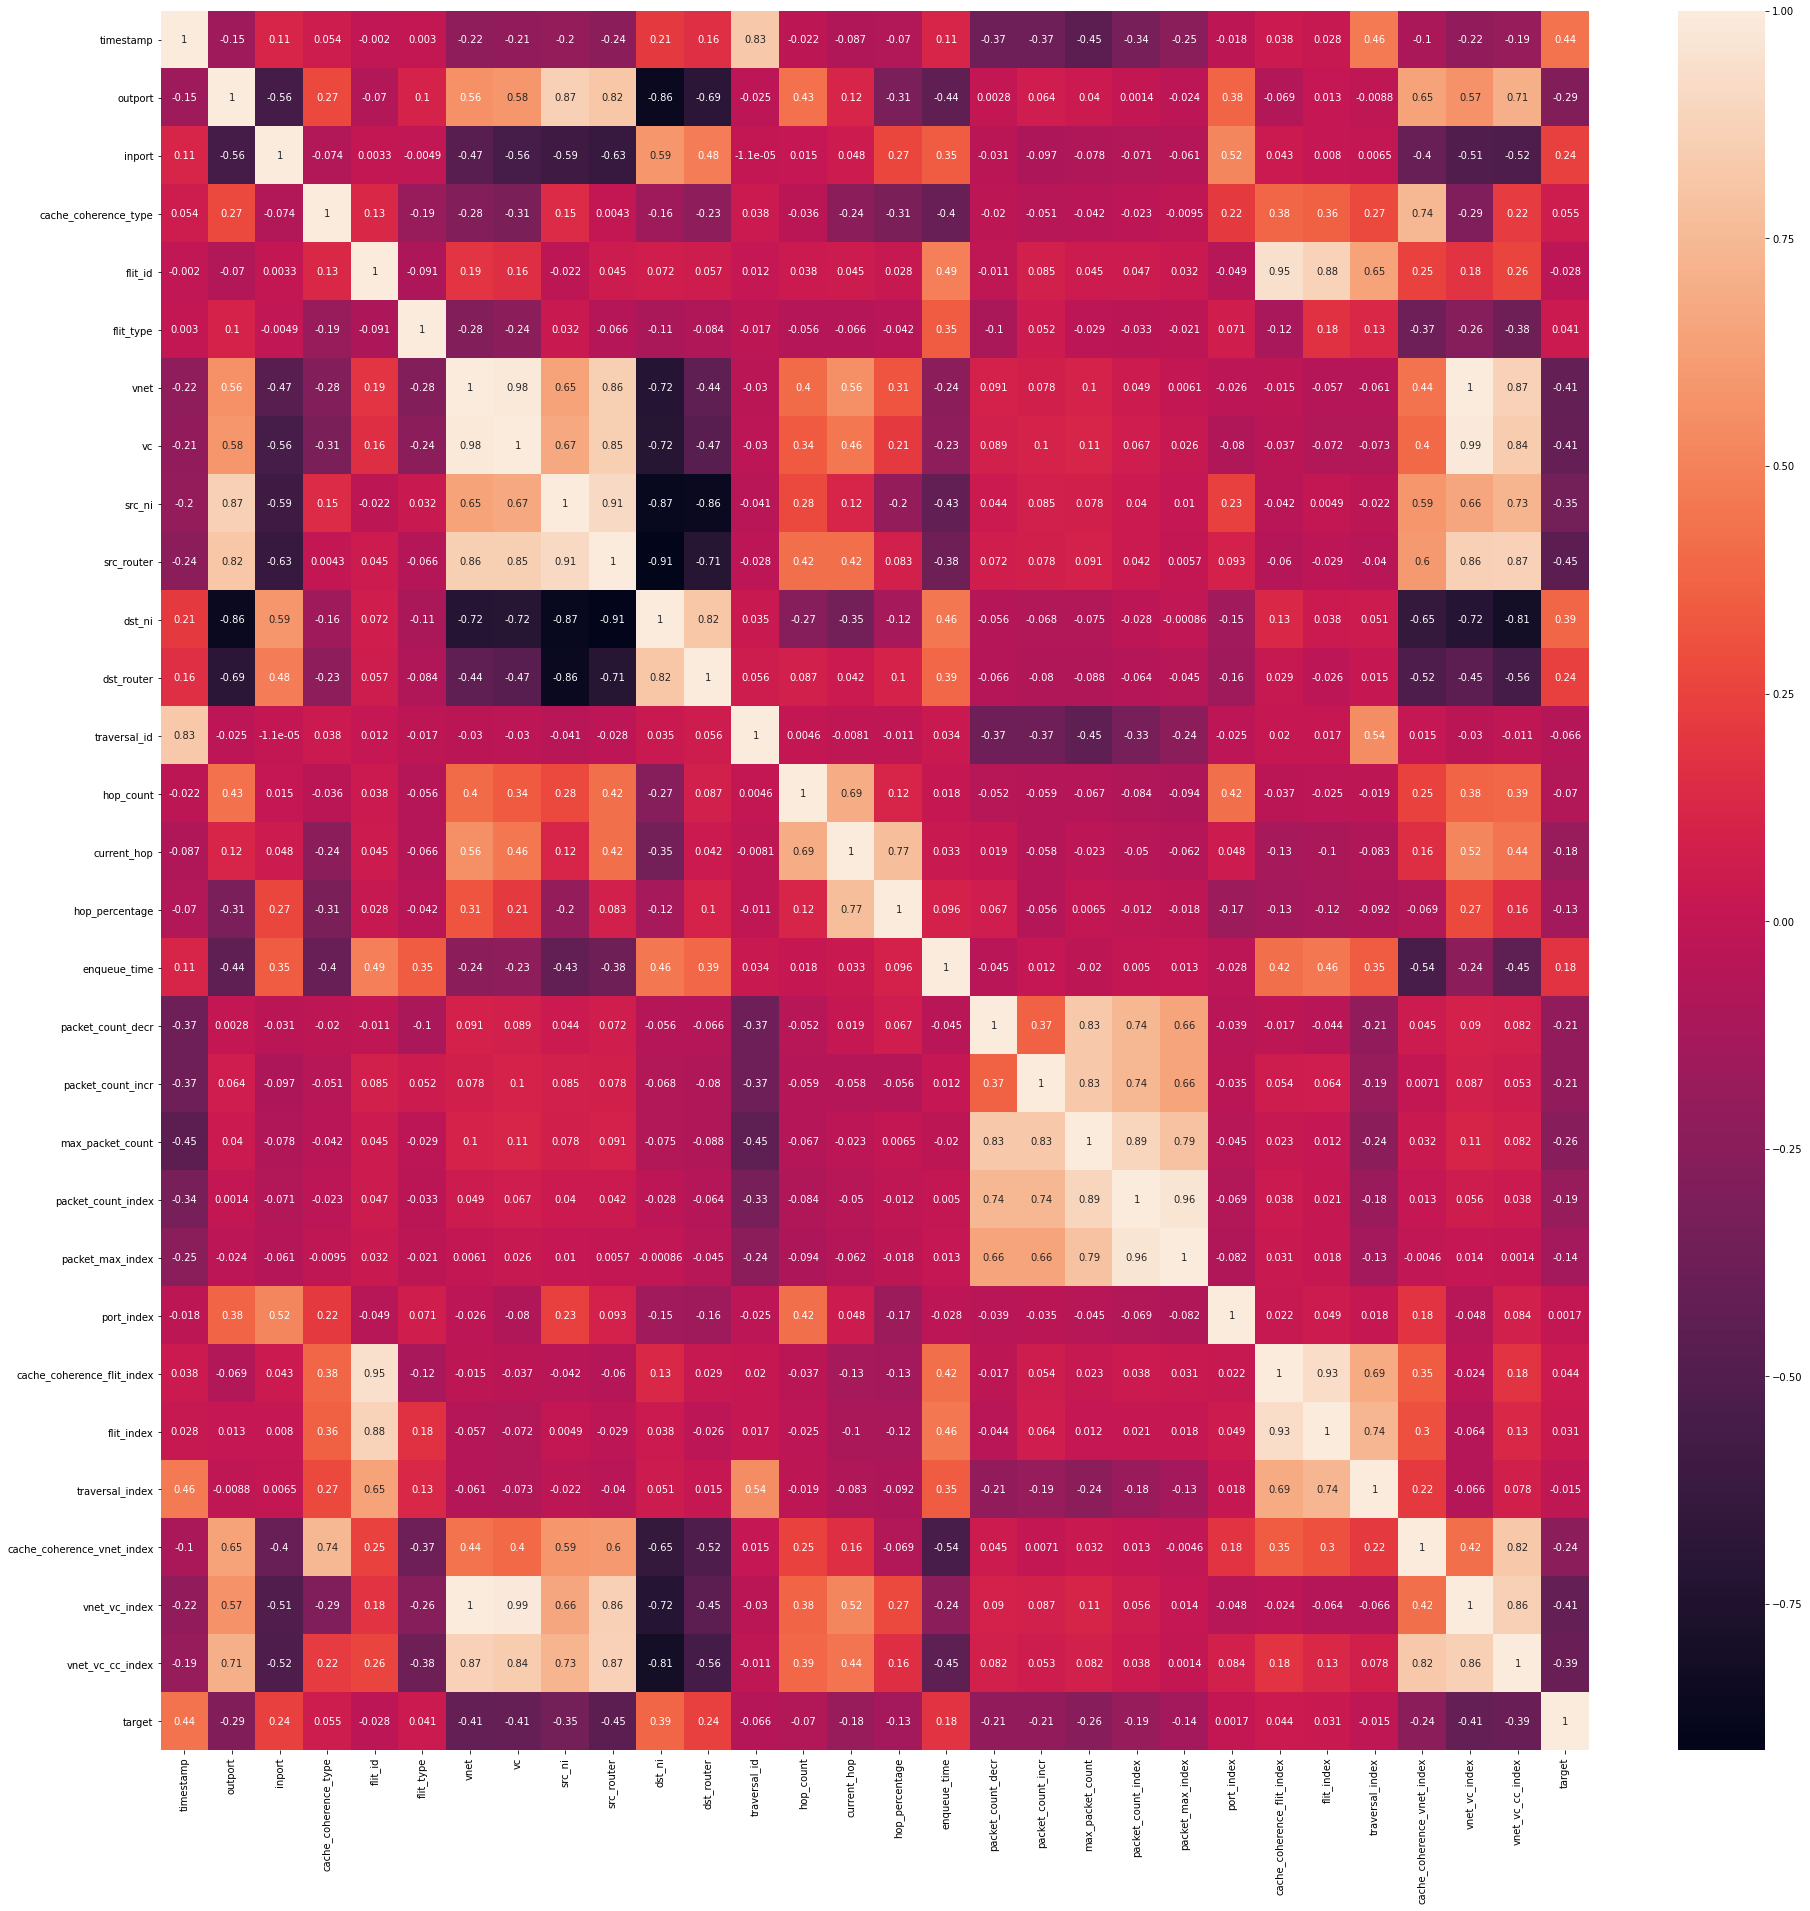

In [126]:
plt.figure(figsize=(32,32))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [127]:
train_X = df.drop(columns=['target','timestamp','src_ni','src_router'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,3,1,4,1,1,5,17,1,1,2,3,2,0.666667,13,5,1,5,5,25,3,4,4,8,20,85,100
1,3,1,4,2,2,5,17,1,1,2,3,2,0.666667,14,4,2,5,8,40,3,8,16,32,20,85,100
2,3,1,4,3,2,5,17,1,1,2,3,2,0.666667,15,3,3,5,9,45,3,12,24,48,20,85,100
3,3,1,4,4,2,5,17,1,1,2,3,2,0.666667,16,2,4,5,8,40,3,16,32,64,20,85,100
4,3,1,4,5,3,5,17,1,1,2,3,2,0.666667,20,1,5,5,5,25,3,20,60,120,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25450,1,3,5,3,2,3,9,29,13,10014,4,2,0.500000,26,1,1,1,1,1,3,15,30,300420,15,27,45
25451,1,3,5,4,2,3,9,29,13,10014,4,2,0.500000,33,1,1,1,1,1,3,20,40,400560,15,27,45
25452,1,3,5,5,3,3,9,29,13,10014,4,2,0.500000,40,1,1,1,1,1,3,25,75,751050,15,27,45
25453,1,3,1,1,4,3,10,29,13,10015,4,2,0.500000,40,1,1,1,1,1,3,1,4,40060,3,30,9


In [128]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,0.25,0.500000,0.00,0.000000,1.0,1.000,0.034483,0.076923,0.000000,0.50,0.5,0.666667,0.150000,0.20,0.00,0.2,0.033333,0.009449,0.250000,0.103448,0.000000,0.000000,0.944444,1.000000,1.000000
1,0.75,0.25,0.500000,0.25,0.333333,1.0,1.000,0.034483,0.076923,0.000000,0.50,0.5,0.666667,0.166667,0.15,0.05,0.2,0.058333,0.015354,0.250000,0.241379,0.139535,0.000024,0.944444,1.000000,1.000000
2,0.75,0.25,0.500000,0.50,0.333333,1.0,1.000,0.034483,0.076923,0.000000,0.50,0.5,0.666667,0.183333,0.10,0.10,0.2,0.066667,0.017323,0.250000,0.379310,0.232558,0.000040,0.944444,1.000000,1.000000
3,0.75,0.25,0.500000,0.75,0.333333,1.0,1.000,0.034483,0.076923,0.000000,0.50,0.5,0.666667,0.200000,0.05,0.15,0.2,0.058333,0.015354,0.250000,0.517241,0.325581,0.000056,0.944444,1.000000,1.000000
4,0.75,0.25,0.500000,1.00,0.666667,1.0,1.000,0.034483,0.076923,0.000000,0.50,0.5,0.666667,0.266667,0.00,0.20,0.2,0.033333,0.009449,0.250000,0.655172,0.651163,0.000113,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25450,0.25,0.75,0.666667,0.50,0.333333,0.0,0.000,1.000000,1.000000,0.903855,0.75,0.5,0.500000,0.366667,0.00,0.00,0.0,0.000000,0.000000,0.250000,0.482759,0.302326,0.302295,0.666667,0.000000,0.395604
25451,0.25,0.75,0.666667,0.75,0.333333,0.0,0.000,1.000000,1.000000,0.903855,0.75,0.5,0.500000,0.483333,0.00,0.00,0.0,0.000000,0.000000,0.250000,0.655172,0.418605,0.403062,0.666667,0.000000,0.395604
25452,0.25,0.75,0.666667,1.00,0.666667,0.0,0.000,1.000000,1.000000,0.903855,0.75,0.5,0.500000,0.600000,0.00,0.00,0.0,0.000000,0.000000,0.250000,0.827586,0.825581,0.755749,0.666667,0.000000,0.395604
25453,0.25,0.75,0.000000,0.00,1.000000,0.0,0.125,1.000000,1.000000,0.903945,0.75,0.5,0.500000,0.600000,0.00,0.00,0.0,0.000000,0.000000,0.250000,0.000000,0.000000,0.040303,0.000000,0.051724,0.000000


In [129]:
train_X[train_X.duplicated()].shape

(114, 26)

In [130]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.562938,0.270469,-0.070493,0.103499,0.561578,0.582397,-0.859429,-0.689801,-0.024872,0.430142,0.115012,-0.313952,-0.435412,0.002835,0.063692,0.040226,0.001377,-0.023989,0.377789,-0.069259,0.013308,-0.008813,0.647194,0.572966,0.708286,-0.286203
inport,-0.562938,1.000000,-0.073996,0.003312,-0.004862,-0.474067,-0.557976,0.586563,0.484048,-0.000011,0.014534,0.048383,0.267793,0.346351,-0.031475,-0.096897,-0.077620,-0.070978,-0.060505,0.521494,0.042566,0.008012,0.006528,-0.401668,-0.510777,-0.519288,0.240438
cache_coherence_type,0.270469,-0.073996,1.000000,0.126971,-0.186421,-0.281658,-0.308648,-0.155642,-0.228588,0.038070,-0.035848,-0.241511,-0.307920,-0.402428,-0.019523,-0.050698,-0.042459,-0.023026,-0.009501,0.215964,0.382267,0.364148,0.274872,0.740027,-0.294129,0.223354,0.054689
flit_id,-0.070493,0.003312,0.126971,1.000000,-0.090756,0.189491,0.163826,0.071761,0.057021,0.011620,0.038207,0.044734,0.028335,0.485610,-0.010837,0.084866,0.044761,0.047490,0.031526,-0.048678,0.945104,0.880003,0.646497,0.251854,0.179981,0.257186,-0.028202
flit_type,0.103499,-0.004862,-0.186421,-0.090756,1.000000,-0.278214,-0.240533,-0.105362,-0.083719,-0.017061,-0.056096,-0.065680,-0.041603,0.348439,-0.100255,0.051508,-0.029475,-0.033017,-0.020587,0.071471,-0.119282,0.176611,0.128713,-0.369777,-0.264251,-0.377606,0.041407
vnet,0.561578,-0.474067,-0.281658,0.189491,-0.278214,1.000000,0.978876,-0.717296,-0.437103,-0.030162,0.403449,0.555178,0.313509,-0.238878,0.090676,0.077931,0.101948,0.048895,0.006128,-0.025914,-0.015353,-0.057019,-0.060712,0.436913,0.996506,0.872365,-0.414707
vc,0.582397,-0.557976,-0.308648,0.163826,-0.240533,0.978876,1.000000,-0.716504,-0.471370,-0.029894,0.340651,0.458311,0.212901,-0.229471,0.088989,0.099678,0.114077,0.066871,0.026345,-0.080408,-0.036902,-0.072388,-0.072507,0.396805,0.992531,0.837155,-0.405018
dst_ni,-0.859429,0.586563,-0.155642,0.071761,-0.105362,-0.717296,-0.716504,1.000000,0.816948,0.034812,-0.267143,-0.347383,-0.120838,0.461361,-0.055825,-0.067880,-0.074798,-0.028330,-0.000859,-0.146372,0.132086,0.037846,0.050961,-0.648700,-0.720656,-0.807972,0.386887
dst_router,-0.689801,0.484048,-0.228588,0.057021,-0.083719,-0.437103,-0.471370,0.816948,1.000000,0.056426,0.086830,0.042351,0.101123,0.388454,-0.065706,-0.079595,-0.087857,-0.063619,-0.045007,-0.162484,0.029186,-0.025728,0.015250,-0.520681,-0.453345,-0.560499,0.243610
traversal_id,-0.024872,-0.000011,0.038070,0.011620,-0.017061,-0.030162,-0.029894,0.034812,0.056426,1.000000,0.004593,-0.008084,-0.010924,0.033754,-0.368554,-0.368519,-0.445671,-0.332962,-0.244696,-0.025208,0.020372,0.016734,0.544987,0.014547,-0.030207,-0.011244,-0.066367


Principal Component Analysis

In [131]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[ 1.52789223, -0.62728657, -0.13750507, ...,  0.46137581,
        -0.02319711, -0.06457723],
       [ 1.51401183, -0.36014235, -0.13058329, ...,  0.4928083 ,
        -0.00651516, -0.02035356],
       [ 1.52774726, -0.09299474, -0.18019468, ...,  0.5265923 ,
        -0.01138506, -0.03416826],
       ...,
       [-0.80479037,  1.08758423, -0.49827171, ..., -0.48417554,
        -0.23537853,  0.40529462],
       [-1.04019715, -0.79265748, -0.7288319 , ..., -0.43833575,
        -0.5359032 ,  0.28428453],
       [ 0.03396325, -0.23498945,  0.98588498, ..., -0.44231192,
         0.00243205,  0.17423354]])

In [132]:
pca.explained_variance_ratio_

array([0.4276527 , 0.15619779, 0.12321421, 0.07512314, 0.06534913,
       0.04924115, 0.04103942, 0.02936235])

Text(0, 0.5, 'Variance')

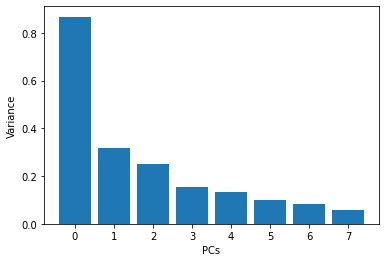

In [133]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [134]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6,7
0,1.527892,-0.627287,-0.137505,-0.384866,0.167700,0.461376,-0.023197,-0.064577
1,1.514012,-0.360142,-0.130583,-0.062905,0.105320,0.492808,-0.006515,-0.020354
2,1.527747,-0.092995,-0.180195,-0.007766,0.118260,0.526592,-0.011385,-0.034168
3,1.541410,0.174132,-0.229796,0.047310,0.130714,0.558403,-0.016562,-0.047860
4,1.523346,0.529980,-0.223858,0.413152,0.056148,0.592251,0.002860,0.003708
...,...,...,...,...,...,...,...,...
25450,-0.787498,0.263975,-0.440505,-0.309866,-0.051487,-0.436873,-0.245840,0.383997
25451,-0.781148,0.592596,-0.504152,-0.221072,-0.044280,-0.428338,-0.257779,0.364435
25452,-0.804790,1.087584,-0.498272,0.199016,-0.133157,-0.484176,-0.235379,0.405295
25453,-1.040197,-0.792657,-0.728832,0.597614,0.025629,-0.438336,-0.535903,0.284285


In [135]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df.corr()

,0,1,2,3,4,5,6,7,target
0,1.000000e+00,-7.889581e-17,8.134137e-17,4.624628e-16,-1.077086e-16,-2.394954e-16,-1.652641e-16,-3.597364e-16,-0.420936
1,-7.889581e-17,1.000000e+00,7.325865e-17,-3.946742e-16,-2.279719e-16,2.206944e-17,5.684688e-16,-3.908785e-17,0.037582
2,8.134137e-17,7.325865e-17,1.000000e+00,1.263455e-16,-8.981208e-16,-9.077706e-17,8.791953e-16,-1.101171e-16,0.013959
3,4.624628e-16,-3.946742e-16,1.263455e-16,1.000000e+00,5.096579e-16,-9.655674e-18,-6.330786e-16,-6.463555e-16,-0.039994
4,-1.077086e-16,-2.279719e-16,-8.981208e-16,5.096579e-16,1.000000e+00,5.162650e-16,2.792036e-16,-2.311777e-16,0.004689
5,-2.394954e-16,2.206944e-17,-9.077706e-17,-9.655674e-18,5.162650e-16,1.000000e+00,1.901998e-16,5.825634e-17,0.035633
6,-1.652641e-16,5.684688e-16,8.791953e-16,-6.330786e-16,2.792036e-16,1.901998e-16,1.000000e+00,6.064816e-17,-0.050182
7,-3.597364e-16,-3.908785e-17,-1.101171e-16,-6.463555e-16,-2.311777e-16,5.825634e-17,6.064816e-17,1.000000e+00,0.058501
target,-4.209357e-01,3.758152e-02,1.395934e-02,-3.999395e-02,4.688863e-03,3.563264e-02,-5.018163e-02,5.850092e-02,1.000000


In [0]:
dimentional_components = pd.DataFrame()
dimentional_components['target'] = corr_df["target"]
dimentional_components['pca-one'] = principal_components[:,0]
dimentional_components['pca-two'] = principal_components[:,1] 
dimentional_components['pca-three'] = principal_components[:,2]

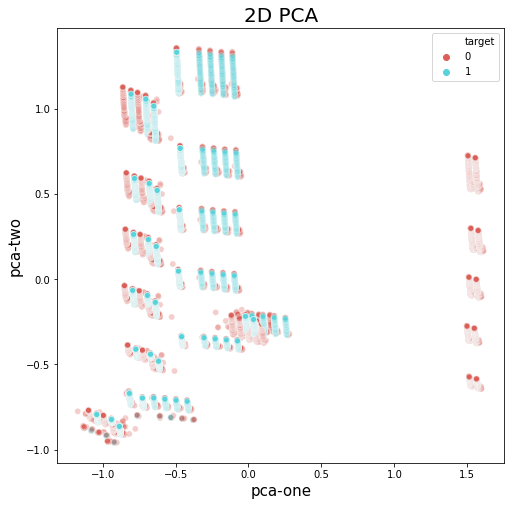

In [137]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

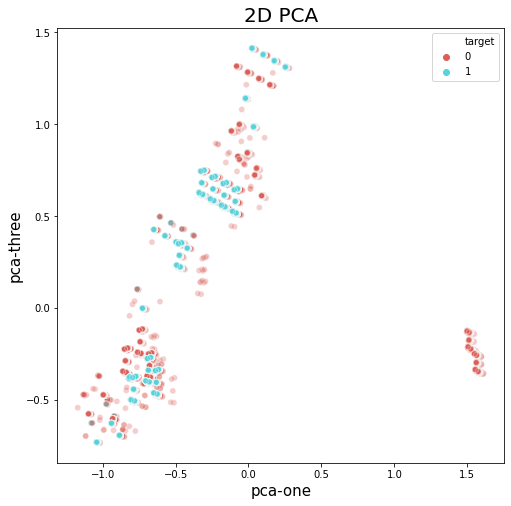

In [138]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

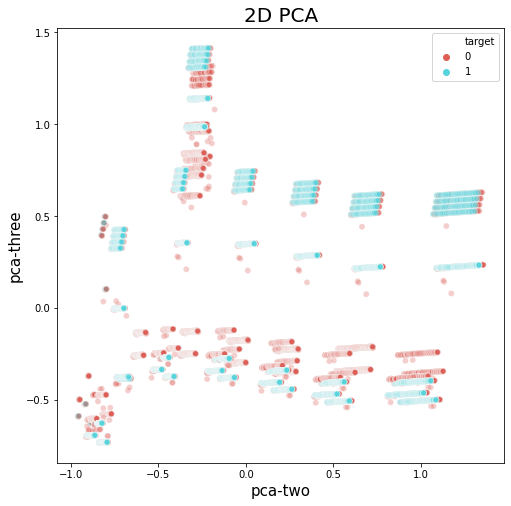

In [139]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-two", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

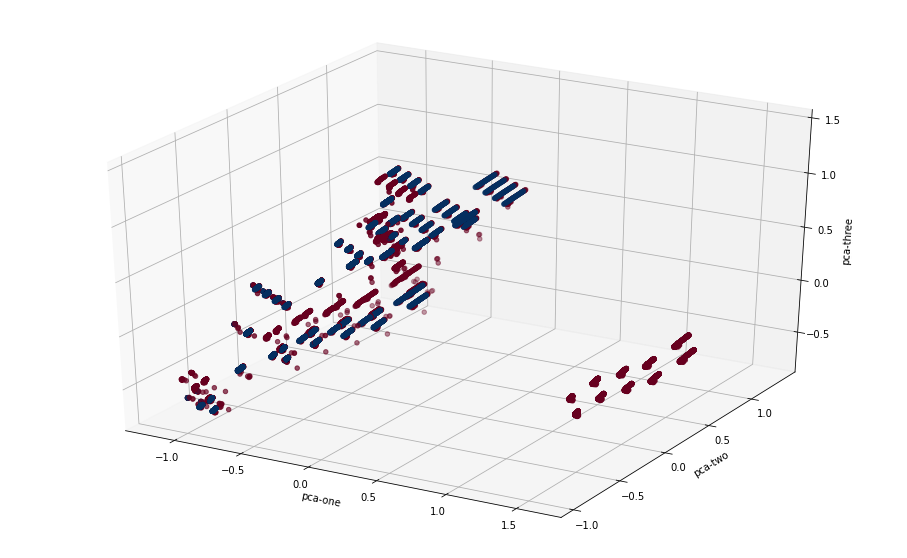

In [140]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-two'], 
    zs=dimentional_components['pca-three'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

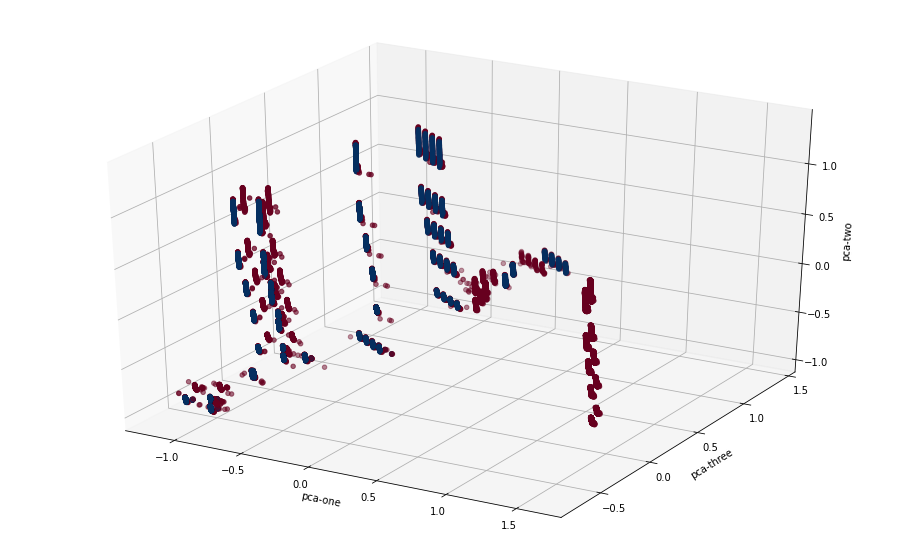

In [141]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-two'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-two')
plt.show()

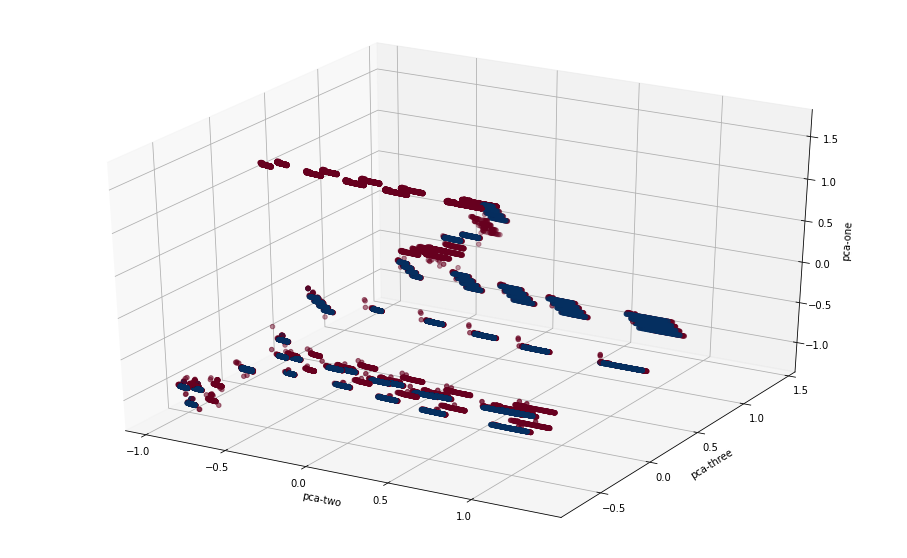

In [142]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-two'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-one'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-two')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-one')
plt.show()

T-distributed Stochastic Neighbor Embedding

In [143]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_components = tsne.fit_transform(train_X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 71.76580214500427 seconds


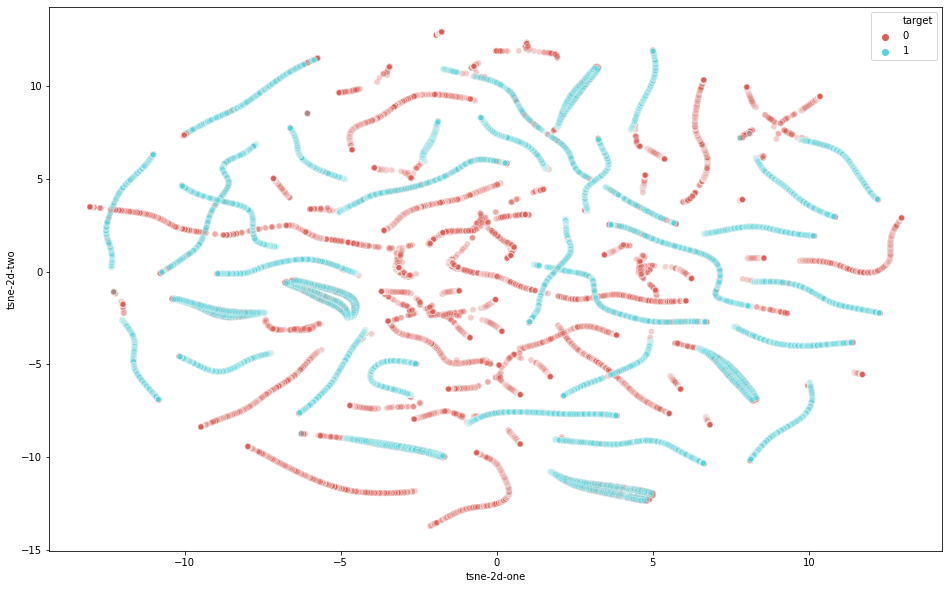

In [144]:
dimentional_components['tsne-2d-one'] = tsne_components[:,0]
dimentional_components['tsne-2d-two'] = tsne_components[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3
)

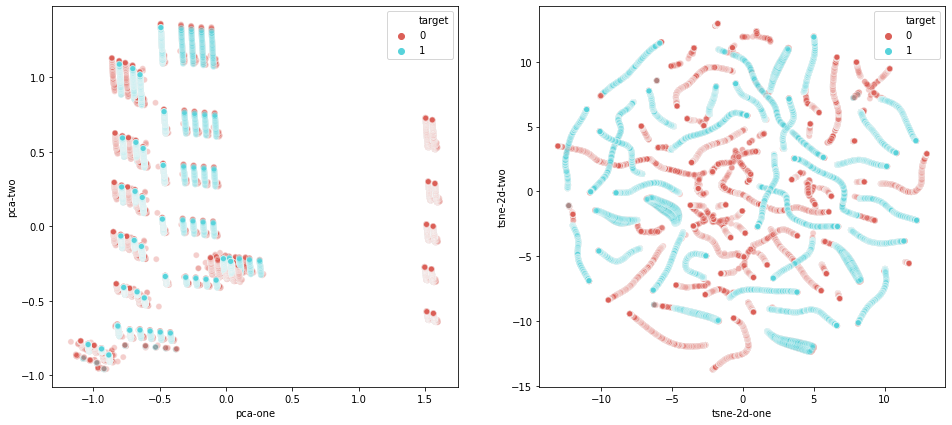

In [145]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [146]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_components = tsne.fit_transform(principal_components)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 65.10778665542603 seconds


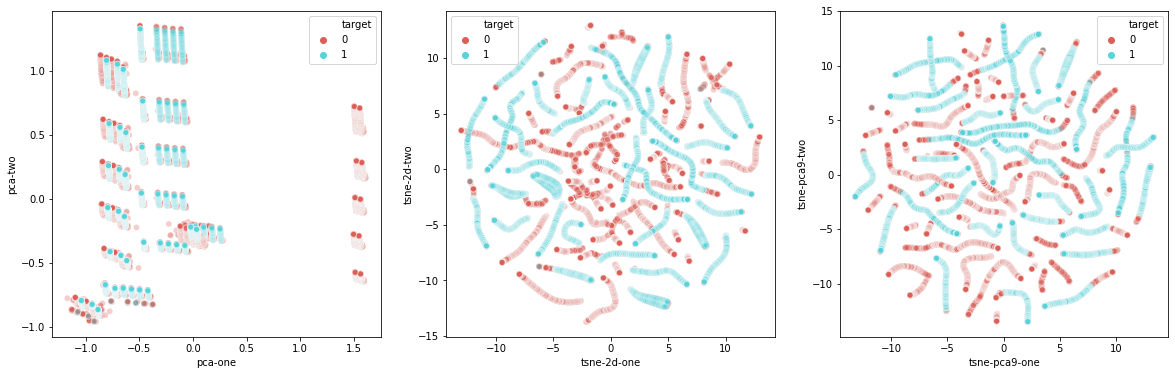

In [147]:
dimentional_components['tsne-pca9-one'] = tsne_pca_components[:,0]
dimentional_components['tsne-pca9-two'] = tsne_pca_components[:,1]
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca9-one", y="tsne-pca9-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax3
)

#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [149]:
train_Y = df['target']
train_Y.value_counts()

0    16793
1     8662
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
5                         vnet  2634.033269
24               vnet_vc_index  2369.299622
6                           vc  2047.600368
7                       dst_ni   855.824599
25            vnet_vc_cc_index   526.141504
16            max_packet_count   514.116582
8                   dst_router   399.163764
0                      outport   292.097299
14           packet_count_decr   257.149120
15           packet_count_incr   256.967462
1                       inport   247.494689
17          packet_count_index   196.903718
23  cache_coherence_vnet_index   124.740304
18            packet_max_index   108.658342
11                 current_hop    84.214657
13                enqueue_time    68.799763
12              hop_percentage    55.237511


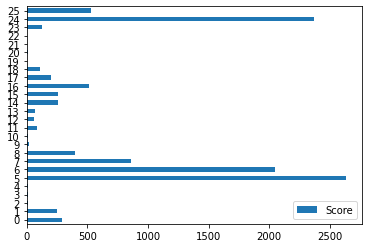

In [152]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [156]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [157]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 79.54232960125712
Test Prediction  79.82714594382243


In [158]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
0,outport,21.053827
7,dst_ni,16.700268
12,hop_percentage,8.391513
10,hop_count,5.852109
1,inport,5.273921
3,flit_id,2.445624
6,vc,1.714120
2,cache_coherence_type,1.538711
21,flit_index,0.881740
13,enqueue_time,-0.584202


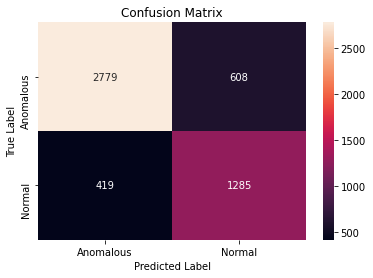

In [159]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [160]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      3387
           1       0.68      0.75      0.71      1704

    accuracy                           0.80      5091
   macro avg       0.77      0.79      0.78      5091
weighted avg       0.81      0.80      0.80      5091



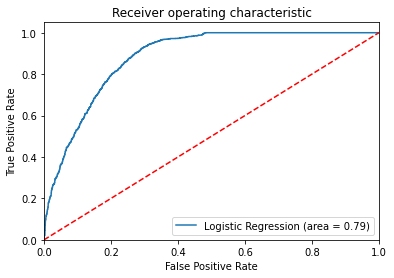

In [161]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

KNeighbors Classifier

In [162]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [164]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 86.56452563347084
Test Prediction  80.16106855234727


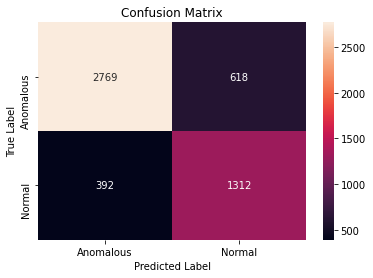

In [165]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [166]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      3387
           1       0.68      0.77      0.72      1704

    accuracy                           0.80      5091
   macro avg       0.78      0.79      0.78      5091
weighted avg       0.81      0.80      0.80      5091



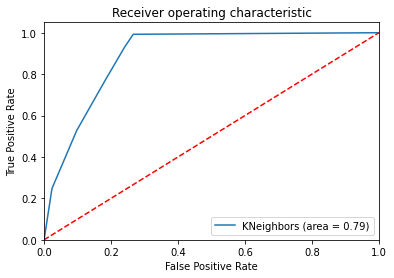

In [167]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [169]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [171]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 67.12335494009035
Test Prediction Score 66.39167157729327


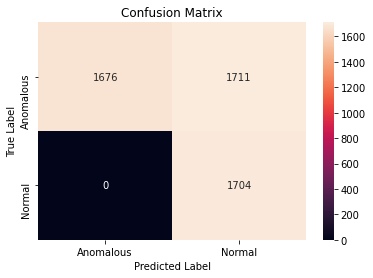

In [172]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [173]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.49      0.66      3387
           1       0.50      1.00      0.67      1704

    accuracy                           0.66      5091
   macro avg       0.75      0.75      0.66      5091
weighted avg       0.83      0.66      0.66      5091



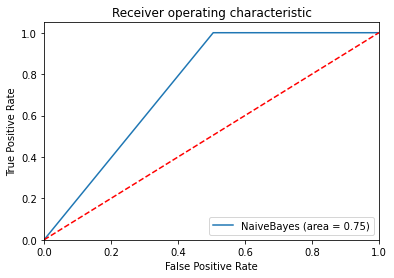

In [174]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

2-Layer Neural Network

In [176]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 16291 samples, validate on 4073 samples
Epoch 1/10
16291/16291 [==============================] - 1s 41us/step - loss: 0.2023 - accuracy: 0.6601 - val_loss: 0.1783 - val_accuracy: 0.6511
Epoch 2/10
16291/16291 [==============================] - 1s 37us/step - loss: 0.1706 - accuracy: 0.6788 - val_loss: 0.1693 - val_accuracy: 0.7130
Epoch 3/10
16291/16291 [==============================] - 1s 37us/step - loss: 0.1643 - accuracy: 0.7239 - val_loss: 0.1644 - val_accuracy: 0.7346
Epoch 4/10
16291/16291 [==============================] - 1s 37us/step - loss: 0.1595 - accuracy: 0.7419 - val_loss: 0.1600 - val_accuracy: 0.7461
Epoch 5/10
16291/16291 [==============================] - 1s 38us/step - loss: 0.1546 - accuracy: 0.7557 - val_loss: 0.1552 - val_accuracy: 0.7564
Epoch 6/10
16291/16291 [==============================] - 1s 36us/step - loss: 0.1500 - accuracy: 0.7666 - val_loss: 0.1508 - val_accuracy: 0.7697
Epoch 7/10
16291/16291 [==============================] - 1s 37us/ste

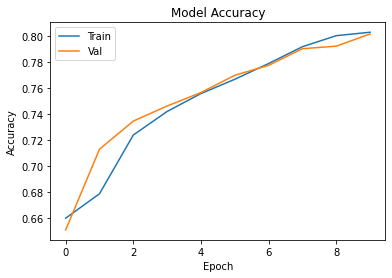

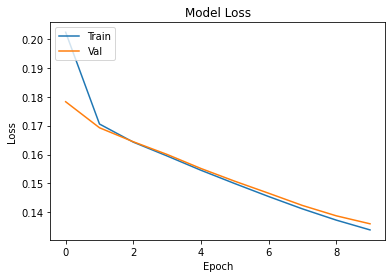

In [177]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [178]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.71%


3-Layer Neural Network

In [179]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 16291 samples, validate on 4073 samples
Epoch 1/15
16291/16291 [==============================] - 1s 39us/step - loss: 0.2391 - accuracy: 0.6485 - val_loss: 0.2321 - val_accuracy: 0.6511
Epoch 2/15
16291/16291 [==============================] - 1s 36us/step - loss: 0.2274 - accuracy: 0.6601 - val_loss: 0.2261 - val_accuracy: 0.6511
Epoch 3/15
16291/16291 [==============================] - 1s 36us/step - loss: 0.2214 - accuracy: 0.6599 - val_loss: 0.2202 - val_accuracy: 0.6504
Epoch 4/15
16291/16291 [==============================] - 1s 37us/step - loss: 0.2167 - accuracy: 0.6594 - val_loss: 0.2162 - val_accuracy: 0.6546
Epoch 5/15
16291/16291 [==============================] - 1s 36us/step - loss: 0.2132 - accuracy: 0.6650 - val_loss: 0.2129 - val_accuracy: 0.6624
Epoch 6/15
16291/16291 [==============================] - 1s 36us/step - loss: 0.2099 - accuracy: 0.6761 - val_loss: 0.2092 - val_accuracy: 0.6921
Epoch 7/15
16291/16291 [==============================] - 1s 36us/ste

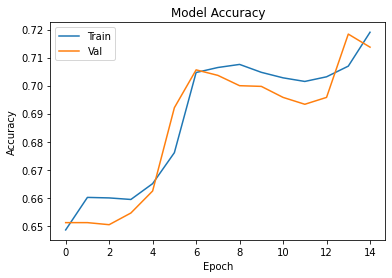

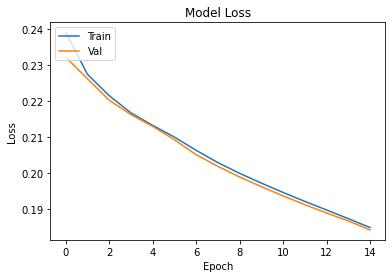

In [180]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [181]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 72.13%


4-Layer Neural Network



In [182]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 16291 samples, validate on 4073 samples
Epoch 1/30
16291/16291 [==============================] - 1s 42us/step - loss: 0.2387 - accuracy: 0.6307 - val_loss: 0.2317 - val_accuracy: 0.6511
Epoch 2/30
16291/16291 [==============================] - 1s 37us/step - loss: 0.2247 - accuracy: 0.6601 - val_loss: 0.2227 - val_accuracy: 0.6511
Epoch 3/30
16291/16291 [==============================] - 1s 36us/step - loss: 0.2175 - accuracy: 0.6601 - val_loss: 0.2162 - val_accuracy: 0.6511
Epoch 4/30
16291/16291 [==============================] - 1s 37us/step - loss: 0.2109 - accuracy: 0.6606 - val_loss: 0.2088 - val_accuracy: 0.6531
Epoch 5/30
16291/16291 [==============================] - 1s 37us/step - loss: 0.2040 - accuracy: 0.6712 - val_loss: 0.2020 - val_accuracy: 0.6627
Epoch 6/30
16291/16291 [==============================] - 1s 37us/step - loss: 0.1979 - accuracy: 0.6749 - val_loss: 0.1963 - val_accuracy: 0.6951
Epoch 7/30
16291/16291 [==============================] - 1s 37us/ste

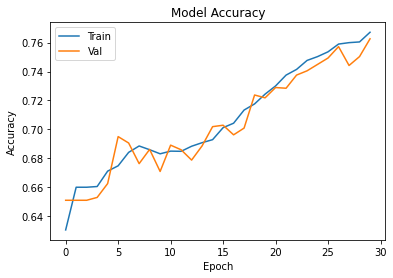

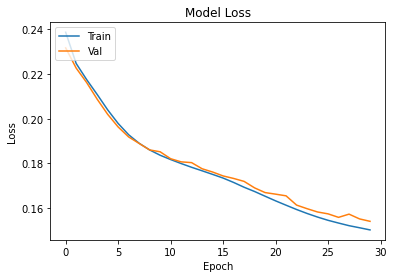

In [183]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [184]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 76.35%


5-Layer Neural Network Optimized

In [185]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 16291 samples, validate on 4073 samples
Epoch 1/100
16291/16291 [==============================] - 2s 95us/step - loss: 0.1471 - accuracy: 0.7724 - val_loss: 0.1294 - val_accuracy: 0.7989
Epoch 2/100
16291/16291 [==============================] - 1s 66us/step - loss: 0.1265 - accuracy: 0.7994 - val_loss: 0.1237 - val_accuracy: 0.8114
Epoch 3/100
16291/16291 [==============================] - 1s 66us/step - loss: 0.1229 - accuracy: 0.8057 - val_loss: 0.2479 - val_accuracy: 0.6629
Epoch 4/100
16291/16291 [==============================] - 1s 65us/step - loss: 0.1311 - accuracy: 0.7932 - val_loss: 0.1244 - val_accuracy: 0.7906
Epoch 5/100
16291/16291 [==============================] - 1s 65us/step - loss: 0.1212 - accuracy: 0.8074 - val_loss: 0.1240 - val_accuracy: 0.8046
Epoch 6/100
16291/16291 [==============================] - 1s 66us/step - loss: 0.1198 - accuracy: 0.8128 - val_loss: 0.1610 - val_accuracy: 0.7262
Epoch 7/100
16291/16291 [==============================] - 1s 6

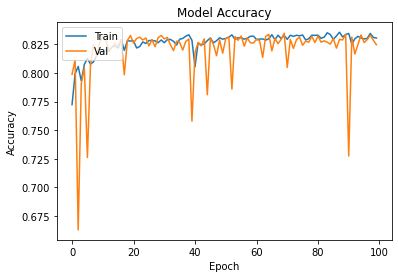

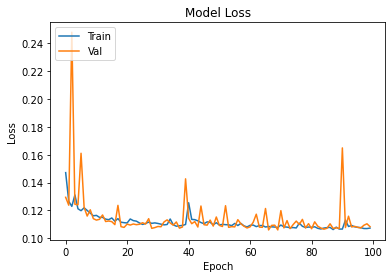

In [186]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [187]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 83.50%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [189]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2) ,
            'max_features':range(0,25,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=3,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 24, 'max_features': 24}
Accuracy : 0.8857297191121587


In [190]:
dt = DecisionTreeClassifier(max_depth=25,max_features=25,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [192]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 97.13710469455903
Test Prediction Score 91.61264977411118


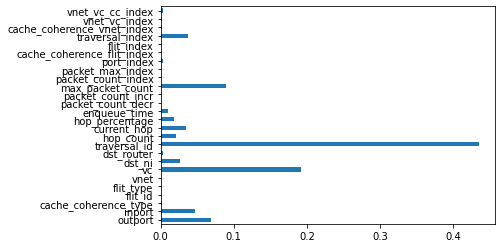

In [193]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

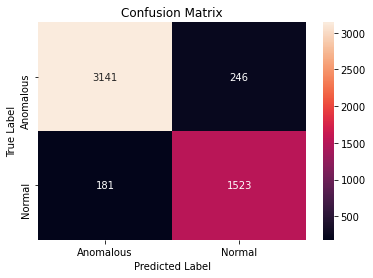

In [194]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [195]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3387
           1       0.86      0.89      0.88      1704

    accuracy                           0.92      5091
   macro avg       0.90      0.91      0.91      5091
weighted avg       0.92      0.92      0.92      5091



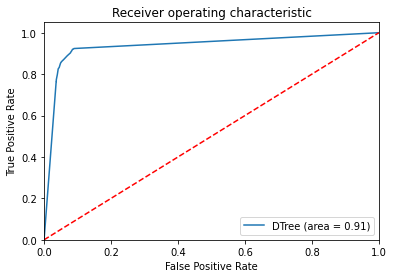

In [196]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
# GridSearchCV
#param_grid={'max_depth':range(0,25,2),
#            'n_estimators':[125,250],
#            'max_features':range(0,25,2)}
#dt_g=RandomForestClassifier(random_state=42)
#dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
#dt_cv.fit(X_train,y_train)

#print("Best parameters:",dt_cv.best_params_)
#print("Accuracy :",dt_cv.best_score_)

In [199]:
rf = RandomForestClassifier(max_depth=25,max_features=25,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features=25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [201]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 99.18974661166764
Test Prediction Score 92.26085248477706


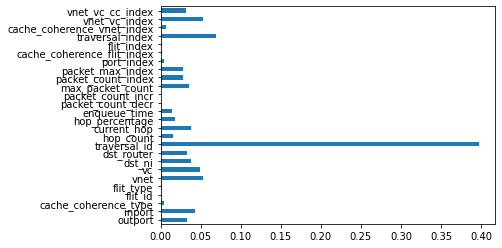

In [202]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

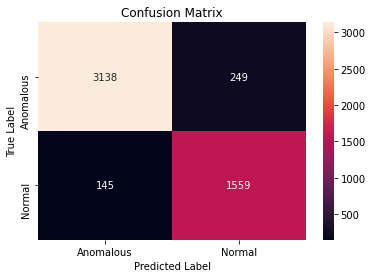

In [203]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [204]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      3387
           1       0.86      0.91      0.89      1704

    accuracy                           0.92      5091
   macro avg       0.91      0.92      0.91      5091
weighted avg       0.92      0.92      0.92      5091



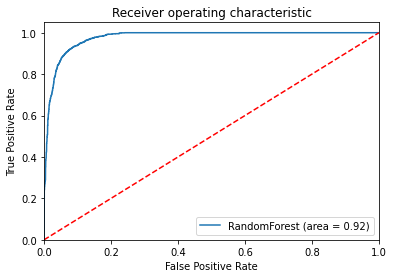

In [205]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
# GridSearchCV
#param_grid={'max_depth':range(0,25,2),
#            'n_estimators':[125,250,500],
#           'min_child_weight':[1,3,6]}
#xgb_g=XGBClassifier(random_state=42)
#xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
#xgb_cv.fit(X_train,y_train)

#print("Best parameters:",xgb_cv.best_params_)
#print("Accuracy :",xgb_cv.best_score_)

In [208]:
xgbc = XGBClassifier(max_depth=25,min_child_weight=1,n_estimators=500,random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [210]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.62188175211158
Test Prediction Score 95.60007857002553


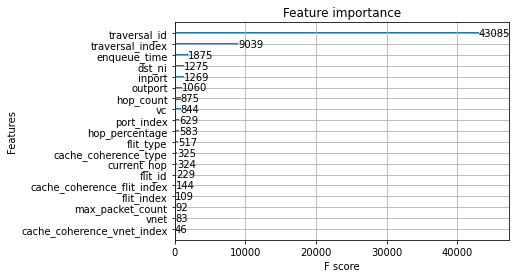

In [211]:
plot_importance(xgbc)
plt.show()

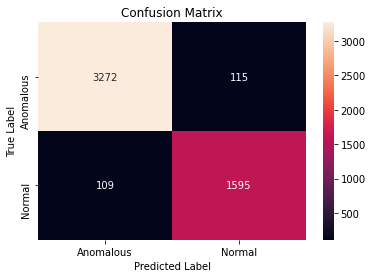

In [212]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [213]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3387
           1       0.93      0.94      0.93      1704

    accuracy                           0.96      5091
   macro avg       0.95      0.95      0.95      5091
weighted avg       0.96      0.96      0.96      5091



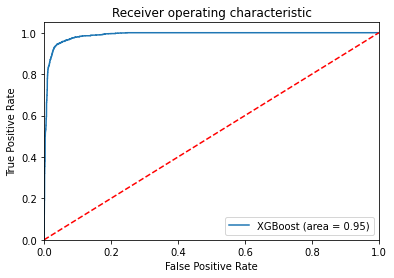

In [214]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
# GridSearchCV
#param_grid = {'n_estimators': [x for x in range(24,40,2)],
#              'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
#lgb_g = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)
#lgb_cv = GridSearchCV(lgb_g, param_grid,cv=10)
#lgb_cv.fit(X_train, y_train)

#print("Best parameters:",lgb_cv.best_params_)
#print("Accuracy :",lgb_cv.best_score_)

In [217]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2,  n_estimators = 500, max_depth = 21, random_state=42, min_child_weight=1,metric='l2')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=21,
               metric='l2', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [219]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 92.46709880180711
Test Prediction Score 84.2270673737969


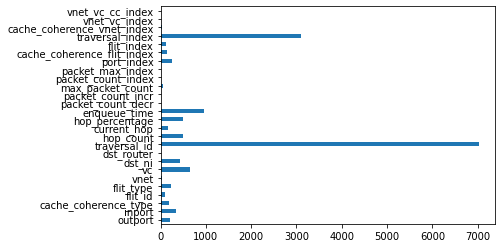

In [220]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

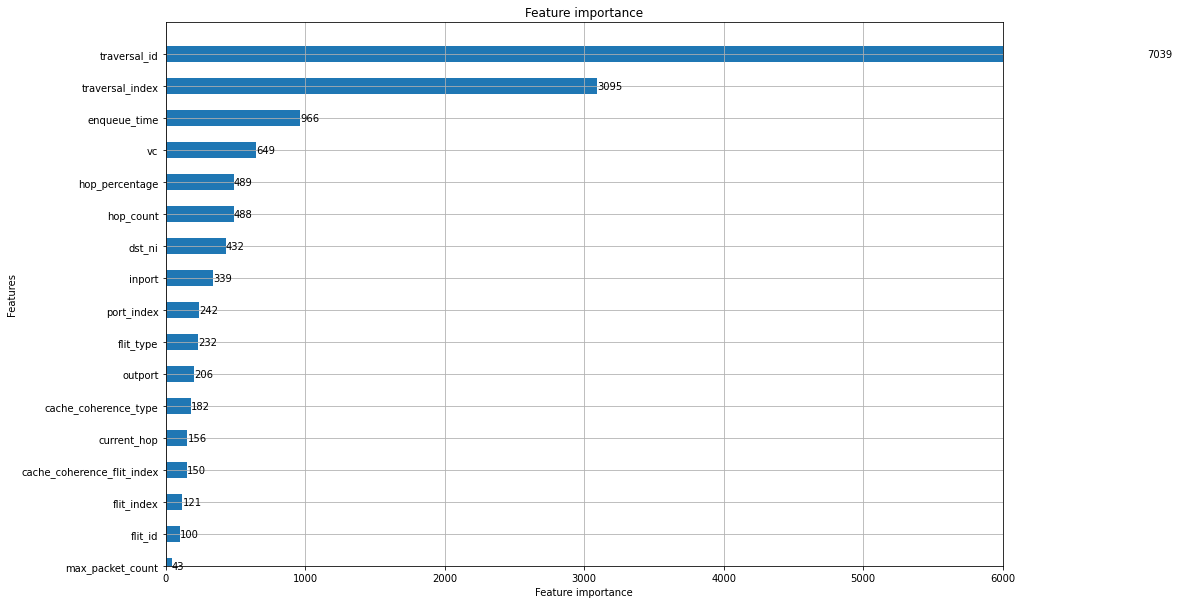

In [221]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6000), ylim = (0,17), figsize = (15,10))
plt.show()

In [222]:
sorted(gbm.feature_importances_,reverse=True)

[7039,
 3095,
 966,
 649,
 489,
 488,
 432,
 339,
 242,
 232,
 206,
 182,
 156,
 150,
 121,
 100,
 43,
 37,
 28,
 6,
 0,
 0,
 0,
 0,
 0,
 0]

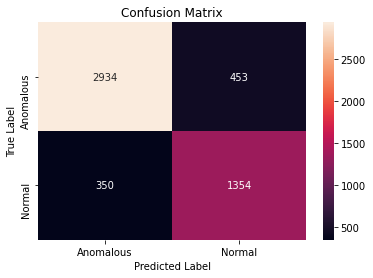

In [223]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [224]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      3387
           1       0.75      0.79      0.77      1704

    accuracy                           0.84      5091
   macro avg       0.82      0.83      0.83      5091
weighted avg       0.85      0.84      0.84      5091



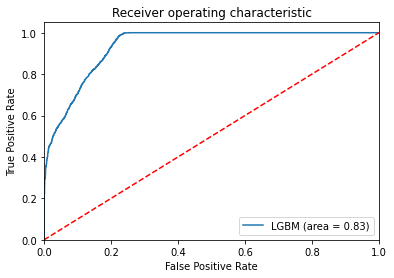

In [225]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()